In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib as mpl

style.use('ggplot')
style.use('tableau-colorblind10')
style.use('seaborn-v0_8-paper')

In [15]:
main = pd.read_csv("IIACheck3.csv")
main

,index,n,m,Dimension,Plurality IIA Check,Copeland IIA Check,STV IIA Check,Borda IIA Check,STAR IIA Check,Plurality Veto IIA Check
0,0,5,5,1D,True,True,True,True,True,True
1,1,5,5,1D,True,True,False,True,False,True
2,2,5,5,1D,False,True,True,True,False,True
3,3,5,5,1D,True,True,True,True,True,True
4,4,5,5,1D,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...
53995,995,100,10,1D,False,True,False,True,False,False
53996,996,100,10,1D,True,True,True,True,True,True
53997,997,100,10,1D,True,True,True,False,True,True
53998,998,100,10,1D,False,True,False,False,True,True


In [16]:
# Assuming you have a DataFrame 'main' and a target value 'True'

target_value=True
IIACheck = main.loc[main["Dimension"]=="1D"].groupby(["m","n"]).agg(
    Plurality_percentage=('Plurality IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    Copeland_percentage=('Copeland IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    STV_percentage=('STV IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    STAR_percentage=('STAR IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    Borda_percentage=('Borda IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    PluralityVeto_percentage=('Plurality Veto IIA Check', lambda x: (x == target_value).sum() / x.count() * 100)
).reset_index()

IIACheck

,m,n,Plurality_percentage,Copeland_percentage,STV_percentage,STAR_percentage,Borda_percentage,PluralityVeto_percentage
0,5,5,81.05,100.00,86.10,52.10,80.55,92.55
1,5,10,70.05,96.35,65.15,49.70,75.95,88.40
2,5,25,64.10,100.00,71.40,63.10,74.90,84.80
3,5,35,60.20,100.00,68.10,62.20,74.60,81.90
4,5,50,59.85,99.75,61.40,63.45,74.75,84.60
5,5,75,58.75,100.00,64.65,64.75,75.90,82.85
6,5,100,58.45,99.90,60.80,64.60,76.40,83.50
7,10,5,74.00,100.00,82.70,26.45,74.30,90.65
8,10,10,62.25,92.50,60.80,21.85,65.90,82.30
9,10,25,50.40,100.00,51.50,26.90,67.30,73.70


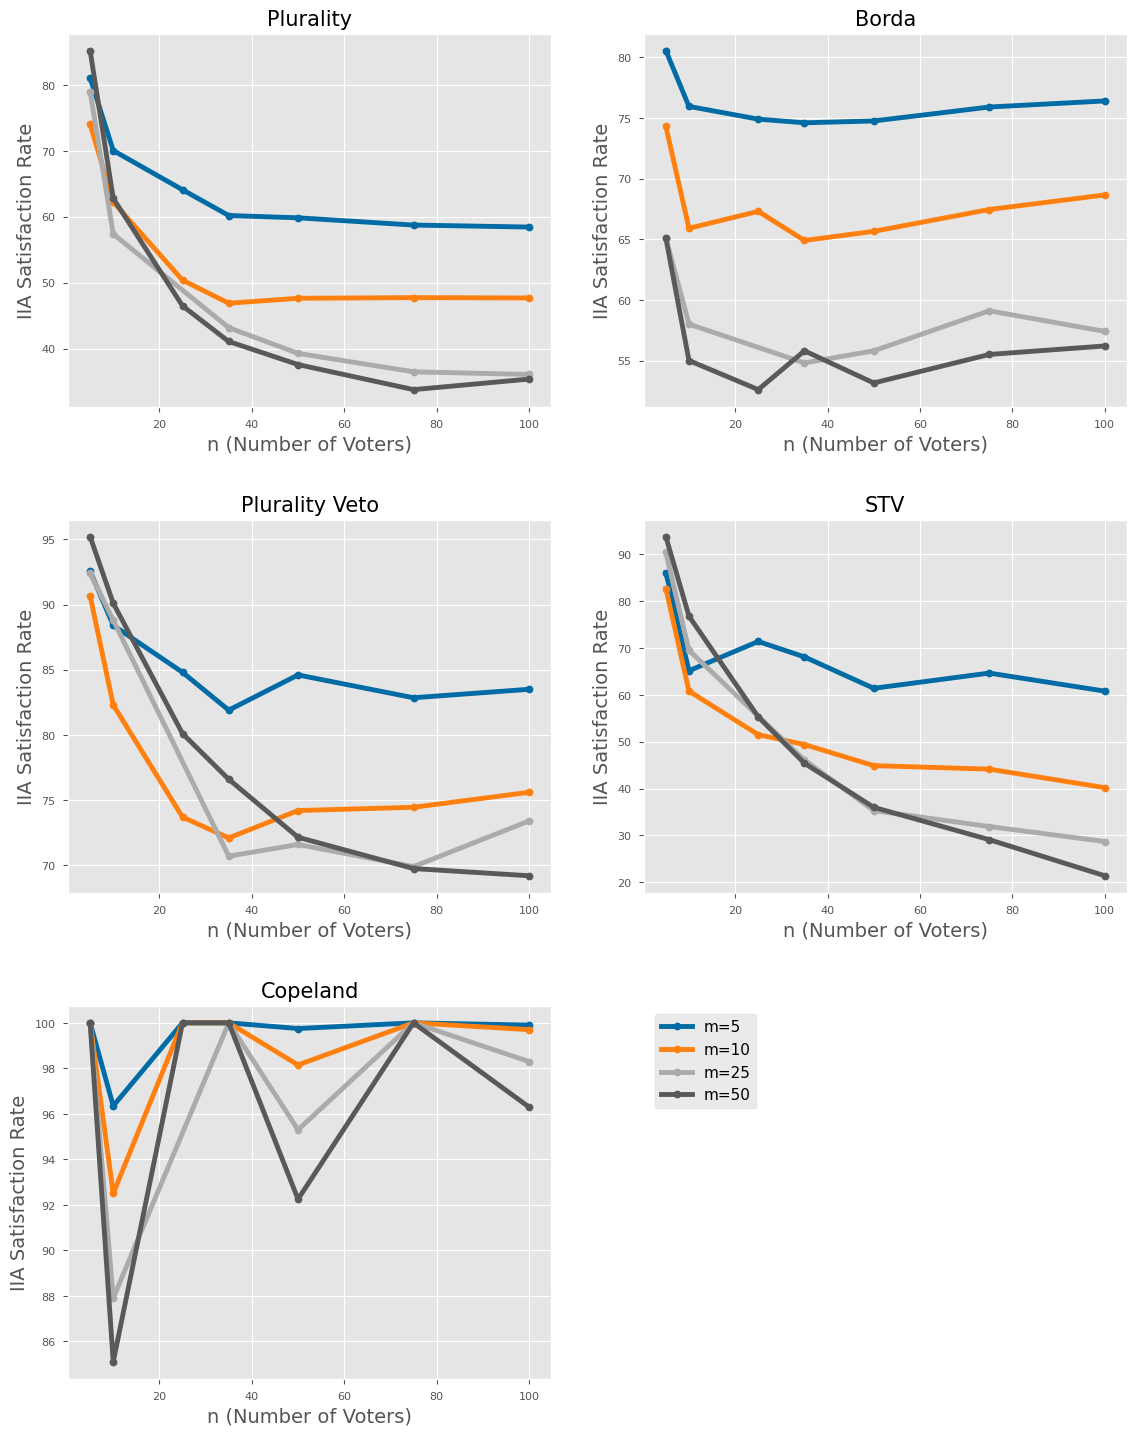

In [30]:
df = pd.DataFrame(IIACheck)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))

efficiency_columns = ['Plurality_percentage', 'Borda_percentage', 
                      'PluralityVeto_percentage', 'STV_percentage', 'Copeland_percentage']
voting_rules = ['Plurality', 'Borda', 'Plurality Veto', 'STV', 'Copeland']
for i, efficiency_type in enumerate(efficiency_columns):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    ax.set_title(f'{voting_rules[i]}', fontsize=15)
    if efficiency_type in df.columns:
        for m_value in sorted(df['m'].unique()):
            df_m = df[df['m'] == m_value]
            ax.plot(df_m['n'], df_m[efficiency_type], marker='o', label=f'm={m_value}', linewidth=3.5)
        ax.grid(True)
    ax.set_xlabel('n (Number of Voters)', fontsize=14)
    ax.set_ylabel('IIA Satisfaction Rate', fontsize=14)

# Hide empty subplots
if len(efficiency_columns) < 6:
    for i in range(len(efficiency_columns), 6):
        row = i // 2
        col = i % 2
        fig.delaxes(axes[row, col])

plt.tight_layout(pad=3.0)
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper left', fontsize=11)
plt.show()

# #color palatte for the colorblind
# CB_color_cycle = ['#006BA4', '#FF800E', '#ABABAB', '#595959',
#                  '#5F9ED1', '#C85200', '#898989', '#A2C8EC', '#FFBC79', '#CFCFCF']
# styles1 = ['s-','o-','^-', 'v-','D-']


# plt.plot(IIACheck.m, IIACheck["Plurality_percentage"], styles1[0], label="Plurality", color = CB_color_cycle[0])
# plt.plot(IIACheck.m, IIACheck["Copeland_percentage"], styles1[1], label="Copeland",  color = CB_color_cycle[1])
# plt.plot(IIACheck.m, IIACheck["STV_percentage"], styles1[2], label="STV", color = CB_color_cycle[2])
# plt.plot(IIACheck.m, IIACheck["Borda_percentage"], styles1[3], label="Borda", color = CB_color_cycle[3])
# plt.plot(IIACheck.m, IIACheck["PluralityVeto_percentage"], styles1[4], label="Plurality Veto", color = CB_color_cycle[4])

# # Customize the plot
# plt.xlabel("Number of Candidates (m)")
# plt.ylabel("Satisfaction Rate")
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# # Show the plot
# plt.show()

In [18]:
main = pd.read_csv("IIACheck4.csv")
main

,index,n,m,Dimension,Distribution,Plurality IIA Check,Copeland IIA Check,STV IIA Check,Borda IIA Check,STAR IIA Check,Plurality Veto IIA Check
0,0,100,5,1D,normal,True,True,True,False,False,True
1,1,100,5,1D,normal,True,True,False,True,False,True
2,2,100,5,1D,normal,False,True,False,True,True,False
3,3,100,5,1D,normal,True,True,True,True,False,True
4,4,100,5,1D,normal,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
15995,995,100,50,1D,bimodal,False,True,False,False,False,False
15996,996,100,50,1D,bimodal,True,True,False,True,False,False
15997,997,100,50,1D,bimodal,False,True,False,True,False,True
15998,998,100,50,1D,bimodal,False,True,False,True,False,True


In [33]:
target_value=True
group_by_m_normal = main.loc[main["Distribution"]=="normal"].groupby("m").agg(
    Plurality_percentage=('Plurality IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    Copeland_percentage=('Copeland IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    STV_percentage=('STV IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    STAR_percentage=('STAR IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    Borda_percentage=('Borda IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    PluralityVeto_percentage=('Plurality Veto IIA Check', lambda x: (x == target_value).sum() / x.count() * 100)
).reset_index()

group_by_m_uniform = main.loc[main["Distribution"]=="uniform"].groupby("m").agg(
    Plurality_percentage=('Plurality IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    Copeland_percentage=('Copeland IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    STV_percentage=('STV IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    STAR_percentage=('STAR IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    Borda_percentage=('Borda IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    PluralityVeto_percentage=('Plurality Veto IIA Check', lambda x: (x == target_value).sum() / x.count() * 100)
).reset_index()

group_by_m_bimodal = main.loc[main["Distribution"]=="bimodal"].groupby("m").agg(
    Plurality_percentage=('Plurality IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    Copeland_percentage=('Copeland IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    STV_percentage=('STV IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    STAR_percentage=('STAR IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    Borda_percentage=('Borda IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    PluralityVeto_percentage=('Plurality Veto IIA Check', lambda x: (x == target_value).sum() / x.count() * 100)
).reset_index()

group_by_m_poisson = main.loc[main["Distribution"]=="poisson"].groupby("m").agg(
    Plurality_percentage=('Plurality IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    Copeland_percentage=('Copeland IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    STV_percentage=('STV IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    STAR_percentage=('STAR IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    Borda_percentage=('Borda IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    PluralityVeto_percentage=('Plurality Veto IIA Check', lambda x: (x == target_value).sum() / x.count() * 100)
).reset_index()

group_by_m_uniform

,m,Plurality_percentage,Copeland_percentage,STV_percentage,STAR_percentage,Borda_percentage,PluralityVeto_percentage
0,5,55.8,99.8,57.9,72.8,70.5,84.3
1,10,46.8,99.6,40.4,45.2,64.9,78.9
2,25,37.9,97.7,28.6,20.9,53.4,75.2
3,50,33.2,97.0,26.4,15.9,55.2,76.1


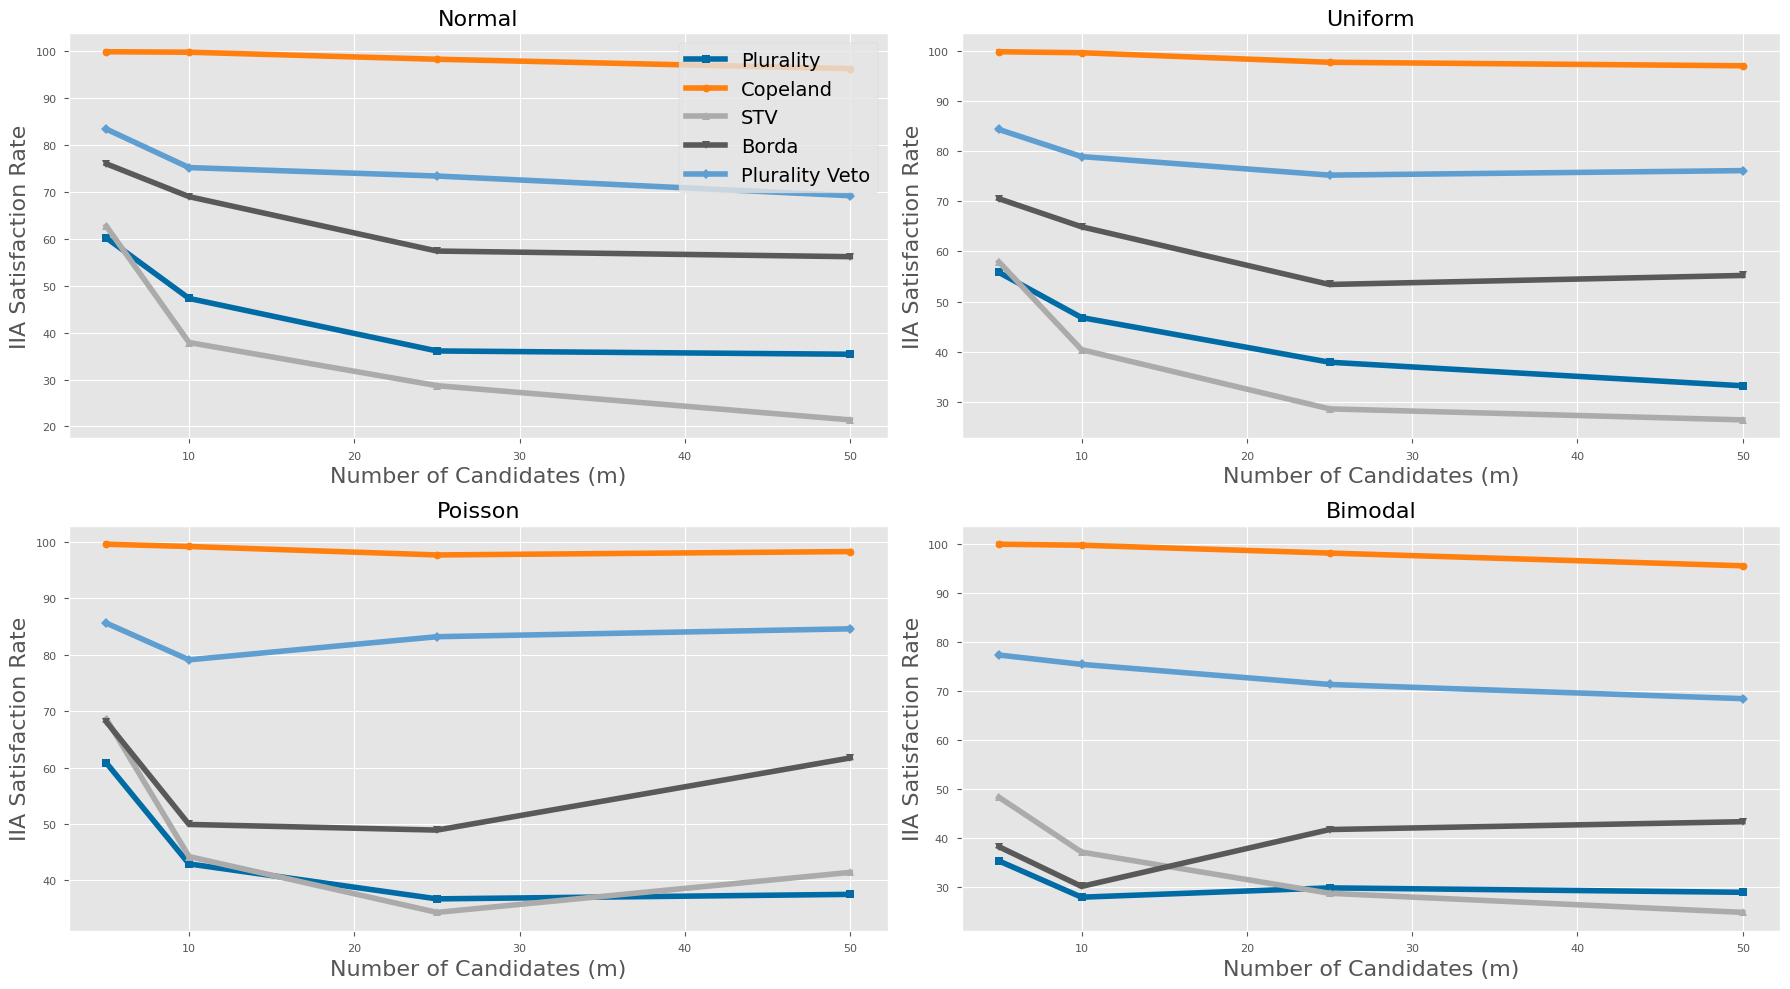

In [25]:
distributions = ["Normal", "Uniform", "Poisson", "Bimodal"]
#color palatte for the colorblind
CB_color_cycle = ['#006BA4', '#FF800E', '#ABABAB', '#595959',
                 '#5F9ED1', '#C85200', '#898989', '#A2C8EC', '#FFBC79', '#CFCFCF']
styles2 = ['s-','o-','^-', 'v-','D-']

plt.figure(figsize=(18,10))
for i, distribution in enumerate(distributions, 1):
    plt.subplot(2, 2, i)  # Create a subplot for each mechanism

    if distribution == 'Bimodal':
        plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["Plurality_percentage"],styles2[0], label="Plurality", linewidth=4)
        plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["Copeland_percentage"], styles2[1], label="Copeland", linewidth=4)
        plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["STV_percentage"], styles2[2], label="STV", linewidth=4)
        plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["Borda_percentage"], styles2[3], label="Borda", linewidth=4)
        plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["PluralityVeto_percentage"], styles2[4], label="Plurality Veto", linewidth=4)

    elif distribution == 'Normal':
        plt.plot(group_by_m_normal.m, group_by_m_normal["Plurality_percentage"], styles2[0], label="Plurality", linewidth=4, color = CB_color_cycle[0])
        plt.plot(group_by_m_normal.m, group_by_m_normal["Copeland_percentage"], styles2[1], label="Copeland", linewidth=4,  color = CB_color_cycle[1])
        plt.plot(group_by_m_normal.m, group_by_m_normal["STV_percentage"], styles2[2], label="STV", linewidth=4, color = CB_color_cycle[2])
        plt.plot(group_by_m_normal.m, group_by_m_normal["Borda_percentage"], styles2[3], label="Borda", linewidth=4, color = CB_color_cycle[3])
        plt.plot(group_by_m_normal.m, group_by_m_normal["PluralityVeto_percentage"], styles2[4], label="Plurality Veto", linewidth=4, color = CB_color_cycle[4])
        plt.legend(fontsize=14)

    elif distribution == 'Poisson':
        plt.plot(group_by_m_poisson.m, group_by_m_poisson["Plurality_percentage"], styles2[0], label="Plurality", linewidth=4, color = CB_color_cycle[0])
        plt.plot(group_by_m_poisson.m, group_by_m_poisson["Copeland_percentage"], styles2[1], label="Copeland", linewidth=4,  color = CB_color_cycle[1])
        plt.plot(group_by_m_poisson.m, group_by_m_poisson["STV_percentage"], styles2[2], label="STV", linewidth=4, color = CB_color_cycle[2])
        plt.plot(group_by_m_poisson.m, group_by_m_poisson["Borda_percentage"], styles2[3], label="Borda", linewidth=4, color = CB_color_cycle[3])
        plt.plot(group_by_m_poisson.m, group_by_m_poisson["PluralityVeto_percentage"], styles2[4], label="Plurality Veto", linewidth=4, color = CB_color_cycle[4])

    elif distribution == 'Uniform':
        plt.plot(group_by_m_uniform.m, group_by_m_uniform["Plurality_percentage"], styles2[0], label="Plurality", linewidth=4, color = CB_color_cycle[0])
        plt.plot(group_by_m_uniform.m, group_by_m_uniform["Copeland_percentage"], styles2[1], label="Copeland", linewidth=4,  color = CB_color_cycle[1])
        plt.plot(group_by_m_uniform.m, group_by_m_uniform["STV_percentage"], styles2[2], label="STV", linewidth=4, color = CB_color_cycle[2])
        plt.plot(group_by_m_uniform.m, group_by_m_uniform["Borda_percentage"], styles2[3], label="Borda", linewidth=4, color = CB_color_cycle[3])
        plt.plot(group_by_m_uniform.m, group_by_m_uniform["PluralityVeto_percentage"], styles2[4], label="Plurality Veto", linewidth=4, color = CB_color_cycle[4])


    plt.title(f'{distribution}',fontsize=16)
    plt.xlabel("Number of Candidates (m)",fontsize=16)
    plt.ylabel("IIA Satisfaction Rate",fontsize=16)



plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()

In [21]:
group_by_m_uniform

,m,Plurality_percentage,Copeland_percentage,STV_percentage,STAR_percentage,Borda_percentage,PluralityVeto_percentage
0,5,55.8,99.8,57.9,72.8,70.5,84.3
1,10,46.8,99.6,40.4,45.2,64.9,78.9
2,25,37.9,97.7,28.6,20.9,53.4,75.2
3,50,33.2,97.0,26.4,15.9,55.2,76.1


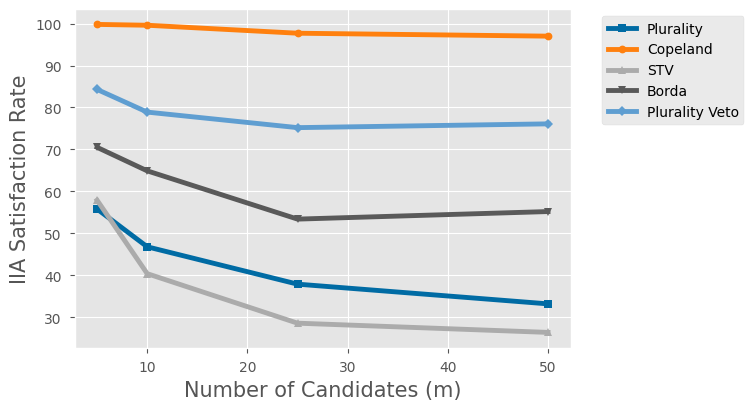

In [32]:
#IIA check with n=100, different m, normal 1D

#color palatte for the colorblind
CB_color_cycle = ['#006BA4', '#FF800E', '#ABABAB', '#595959',
                 '#5F9ED1', '#C85200', '#898989', '#A2C8EC', '#FFBC79', '#CFCFCF']
styles1 = ['s-','o-','^-', 'v-','D-']


plt.plot(group_by_m_uniform.m, group_by_m_uniform["Plurality_percentage"], styles2[0], label="Plurality", color = CB_color_cycle[0], linewidth=3.5)
plt.plot(group_by_m_uniform.m, group_by_m_uniform["Copeland_percentage"], styles2[1], label="Copeland",  color = CB_color_cycle[1], linewidth=3.5)
plt.plot(group_by_m_uniform.m, group_by_m_uniform["STV_percentage"], styles2[2], label="STV", color = CB_color_cycle[2], linewidth=3.5)
plt.plot(group_by_m_uniform.m, group_by_m_uniform["Borda_percentage"], styles2[3], label="Borda", color = CB_color_cycle[3], linewidth=3.5)
plt.plot(group_by_m_uniform.m, group_by_m_uniform["PluralityVeto_percentage"], styles2[4], label="Plurality Veto", color = CB_color_cycle[4], linewidth=3.5)
# Customize the plot
plt.xlabel("Number of Candidates (m)", fontsize=15)
plt.ylabel("IIA Satisfaction Rate", fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


# Show the plot
plt.show()

In [23]:
# df = IIACheck
# # List of columns you want to compare
# columns_to_compare = ["Plurality_percentage", "Copeland_percentage", "STV_percentage", "Borda_percentage", "PluralityVeto_percentage"]

# # Transpose the DataFrame
# df = df.set_index("Dimension")[columns_to_compare].T

# # Plotting
# ax = df.plot(kind="bar", figsize=(10, 6))
# plt.xlabel("Method")
# plt.ylabel("Percentage")
# plt.title("Comparison of Percentages by Method and Dimension")
# plt.legend(title="Dimension", loc="upper left", bbox_to_anchor=(1, 1))
# plt.tight_layout()
# plt.show()

dimension = IIACheck.Dimension
plurality_percentage = IIACheck["Plurality_percentage"]
copeland_percentage = IIACheck["Copeland_percentage"]
stv_percentage = IIACheck["STV_percentage"]
borda_percentage = IIACheck["Borda_percentage"]
pluralityVeto_percentage = IIACheck["PluralityVeto_percentage"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(dimension))

# Create the bar plots for each dimension
plt.bar(x - 2 * bar_width, plurality_percentage, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_percentage, width=bar_width, label="Copeland")
plt.bar(x, stv_percentage, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_percentage, width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, star_max, width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, pluralityVeto_percentage, width=bar_width, label="Plurality Veto")


# Customize the plot
plt.xlabel("Dimesion")
plt.ylabel("IIA Satisfaction Rate")
plt.xticks(x, dimension)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Dimension'

In [2]:
main = pd.read_csv("IIACheck4.csv")
main

,index,n,m,Dimension,Distribution,Plurality IIA Check,Copeland IIA Check,STV IIA Check,Borda IIA Check,STAR IIA Check,Plurality Veto IIA Check
0,0,100,5,1D,normal,True,True,True,False,False,True
1,1,100,5,1D,normal,True,True,False,True,False,True
2,2,100,5,1D,normal,False,True,False,True,True,False
3,3,100,5,1D,normal,True,True,True,True,False,True
4,4,100,5,1D,normal,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
22995,995,100,25,2D,poisson,True,True,True,True,True,False
22996,996,100,25,2D,poisson,True,True,False,True,False,False
22997,997,100,25,2D,poisson,False,True,False,True,True,True
22998,998,100,25,2D,poisson,False,True,True,True,False,True


In [7]:
target_value=True
IIACheck = main.loc[main["Distribution"]=="uniform"].groupby(["Dimension","m"]).agg(
    Plurality=('Plurality IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    Copeland=('Copeland IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    STV=('STV IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    STAR=('STAR IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    Borda=('Borda IIA Check', lambda x: (x == target_value).sum() / x.count() * 100),
    PluralityVeto=('Plurality Veto IIA Check', lambda x: (x == target_value).sum() / x.count() * 100)
).reset_index()

IIACheck

,Dimension,m,Plurality,Copeland,STV,STAR,Borda,PluralityVeto
0,1D,5,55.8,99.8,57.9,72.8,70.5,84.3
1,1D,10,46.8,99.6,40.4,45.2,64.9,78.9
2,1D,25,37.9,97.7,28.6,20.9,53.4,75.2
3,1D,50,33.2,97.0,26.4,15.9,55.2,76.1
4,2D,5,51.7,99.3,73.8,90.1,79.6,84.0
5,2D,10,40.9,97.9,40.8,79.4,79.0,65.5
6,2D,25,32.6,95.9,16.9,62.1,80.5,50.9
7,2D,50,26.4,92.0,10.6,48.4,85.1,42.3


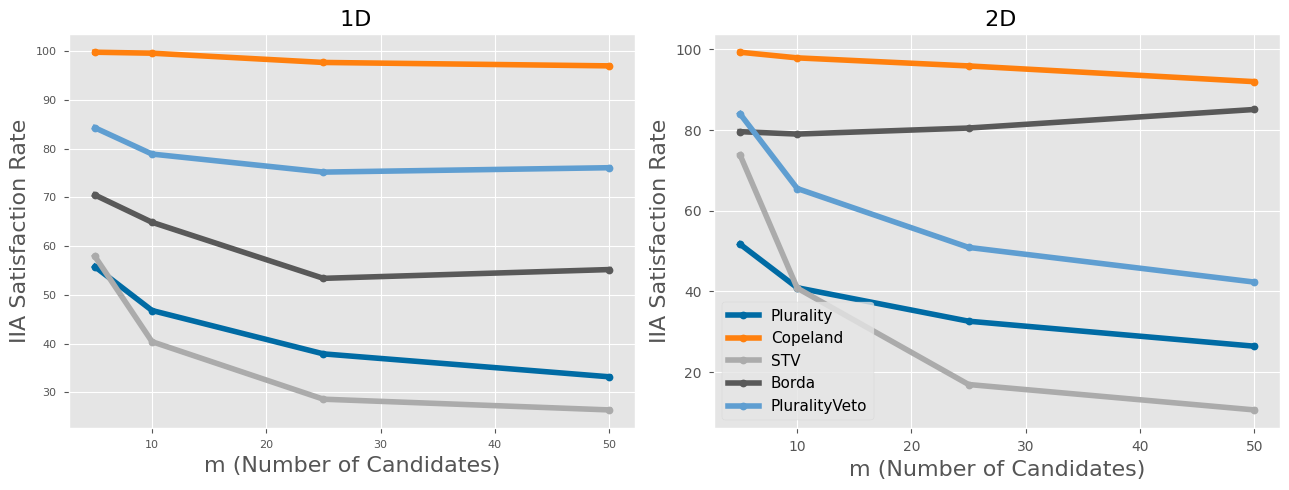

In [8]:
df = pd.DataFrame(IIACheck)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

efficiency_columns = ['Plurality', "Copeland",'STV', 
                       'Borda', 'PluralityVeto']


for i, dimension_value in enumerate(["1D","2D"]):
    df_dimension = df[df['Dimension'] == dimension_value]
    ax = axes[i]
    ax.set_title(f' {dimension_value}', fontsize=16)
    for efficiency_type in efficiency_columns:
        ax.plot(df_dimension['m'], df_dimension[efficiency_type], marker='o', label=efficiency_type, linewidth=4)
    ax.set_xlabel('m (Number of Candidates)', fontsize=16)
    ax.set_ylabel('IIA Satisfaction Rate', fontsize=16)
    ax.grid(True)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.legend(fontsize=11)

plt.tight_layout()
plt.show()